In [1]:
import rasterio
import numpy as np

# Open the raster file in read-only mode
with rasterio.open(r"C:\Users\Andrea\Documents\Flow\OpenGeoSys\ogs6hetPerm2016aquiferLim\inRaster\dem.asc", 'r') as src:
    # Read the raster data into a numpy ndarray
    dataTop = src.read()
    # Copy the metadata from the source raster file
    metadata = src.meta
    
    
    
with rasterio.open(r"C:\Users\Andrea\Documents\Flow\OpenGeoSys\ogs6hetPerm2016aquiferLim\inRaster\baseAquiferoSuperficialePo.asc", 'r') as src1:
    # Read the raster data into a numpy ndarray
    dataBottom = src1.read()

    
    



In [2]:
dataBottom[dataTop-dataBottom<1]=(dataTop[dataTop-dataBottom<1]-1)

In [3]:
with rasterio.open('baseAquiferoSuperficialePo.asc', 'w', **metadata) as dst:
    # Write the modified data to the new raster file
        dst.write(dataBottom)

In [4]:
Isopach  = (dataBottom!=-9999)*((dataTop-dataBottom)<383)*(dataTop-dataBottom)+(dataBottom==-9999)*dataBottom+((dataTop-dataBottom)>383)*(-9999)
Isopach = (Isopach<0)*(-9999)+(Isopach>=0)*Isopach
np.amax(Isopach)

382.9910888671875

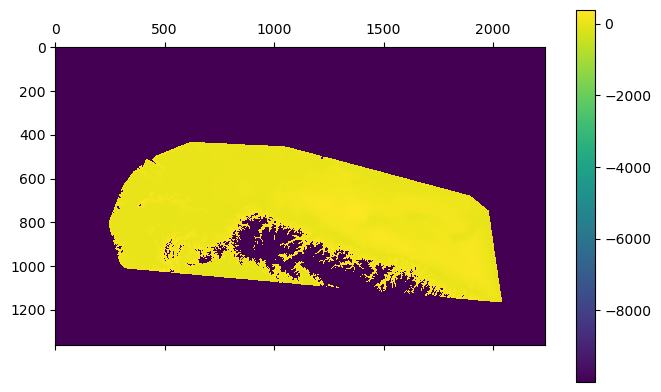

In [5]:
import matplotlib.pyplot as plt
plt.matshow(Isopach[0,:,:])
plt.colorbar()

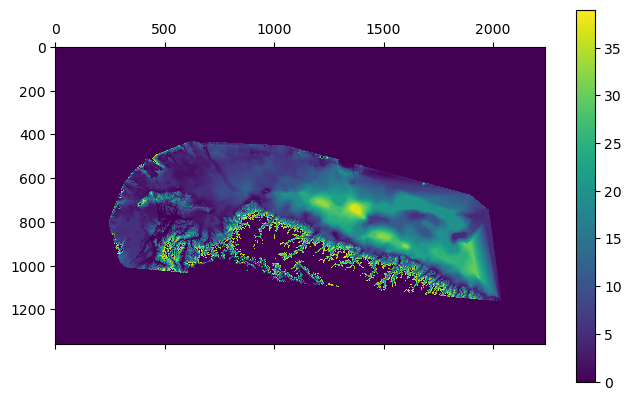

In [6]:
isoPIdx = (Isopach<=0)*(-9999)+(Isopach>0)*Isopach/10
plt.matshow(isoPIdx[0,:,:], vmin=0, vmax=39)
plt.colorbar()

10.0
-1.0


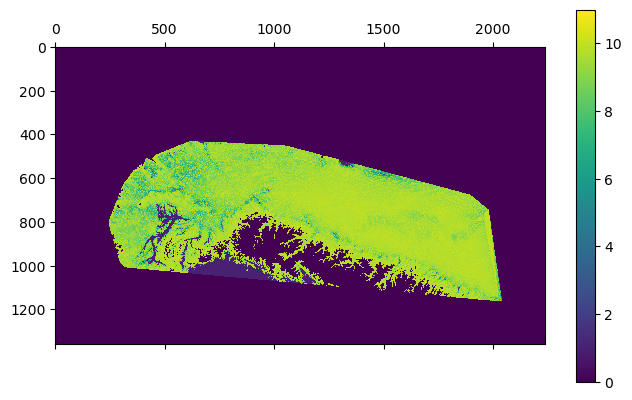

0
255.0
-1.0


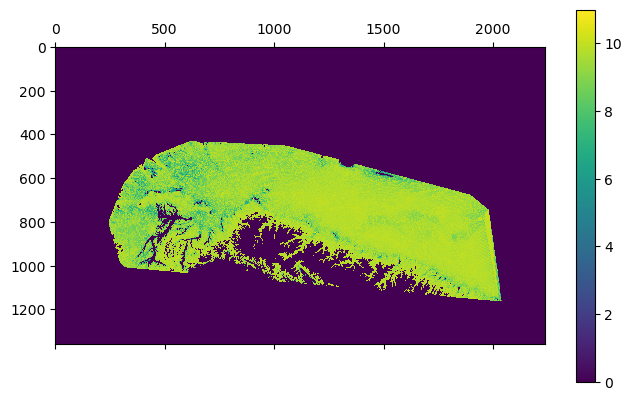

1
380.0
-1.0


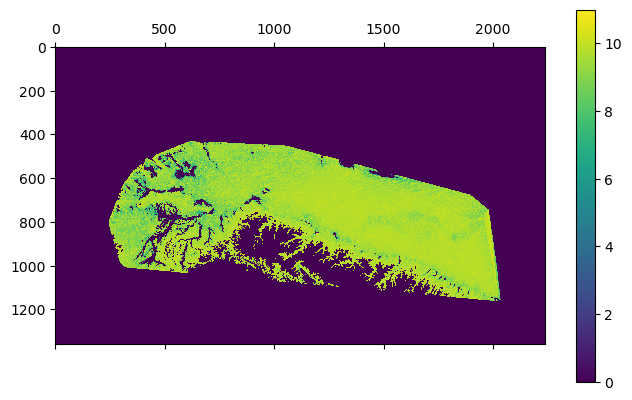

2
445.0
-1.0000000000000284


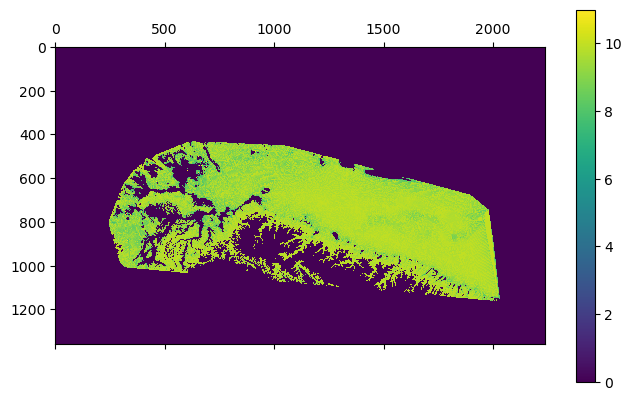

3
420.0
-1.0000000000000284


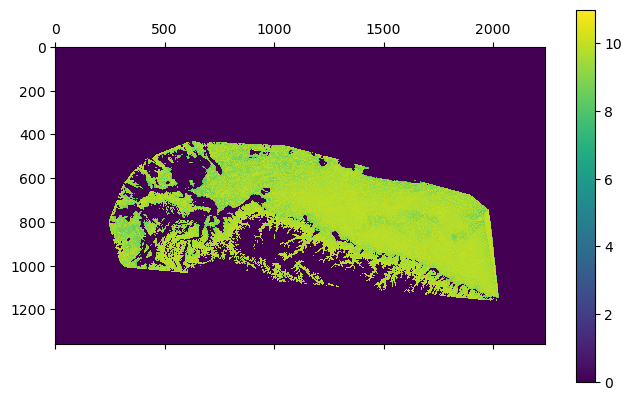

4
435.0
-1.0000000000000284


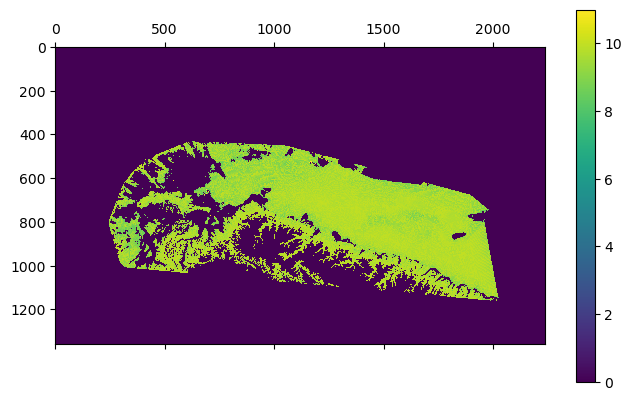

5
455.0
-1.0000000000000284


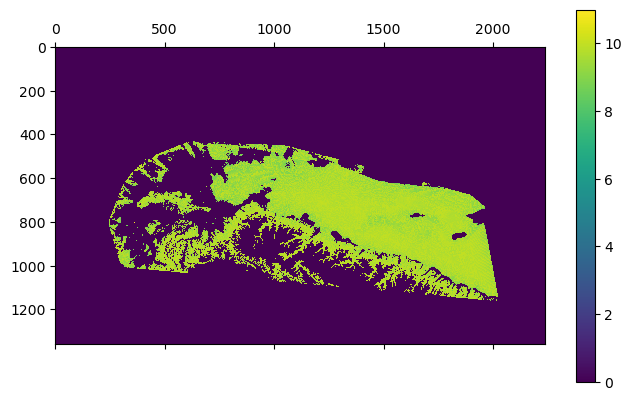

6
425.0
-1.0000000000000568


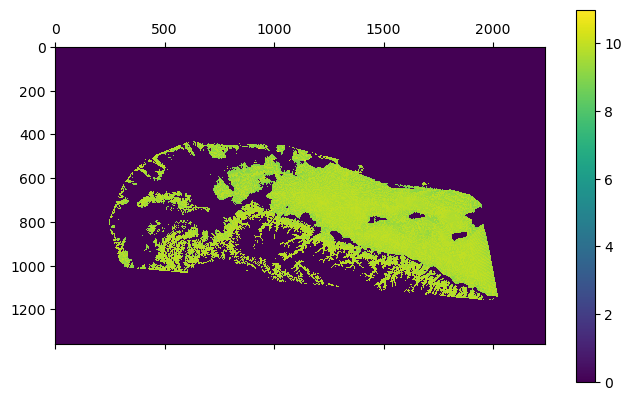

7
250.0
-1.0000000000000284


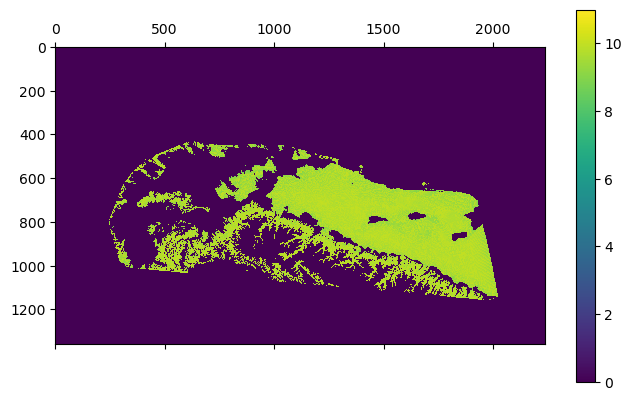

8
375.0
-1.0000000000000568


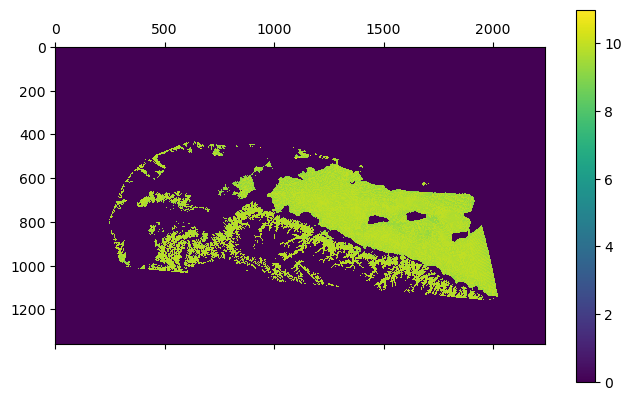

9
395.0
-1.0000000000000284


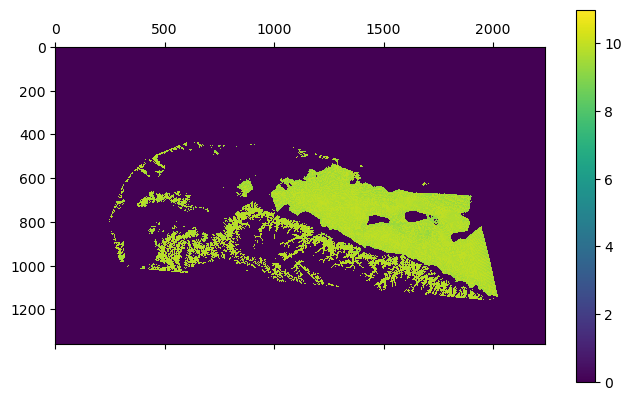

10
250.0
-1.0000000000000284


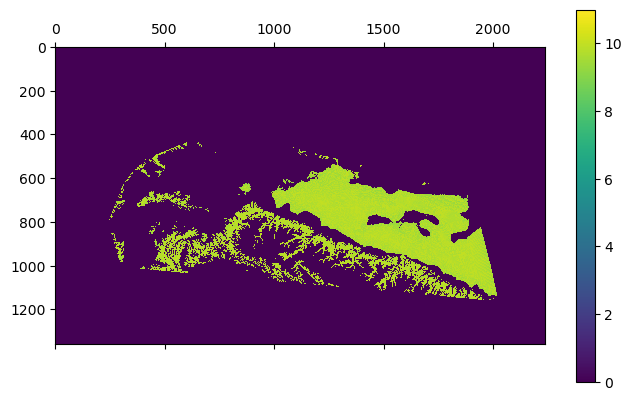

11
250.0
-1.0000000000000568


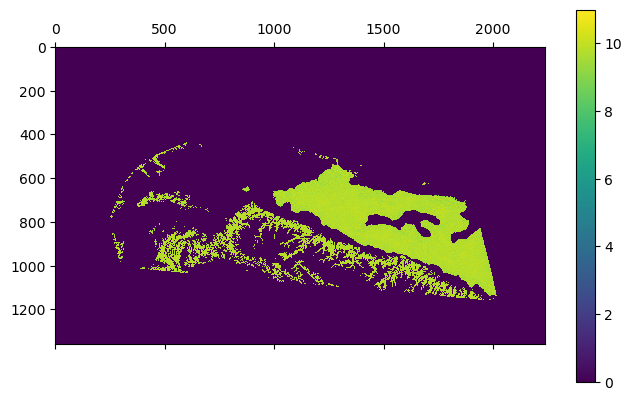

12
275.0
-1.0000000000000284


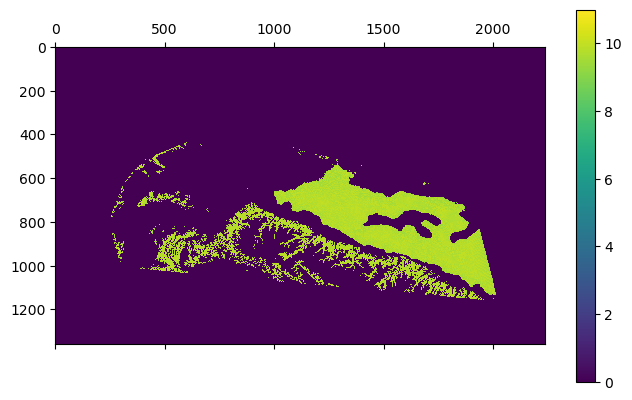

13
250.0
-1.0000000000000284


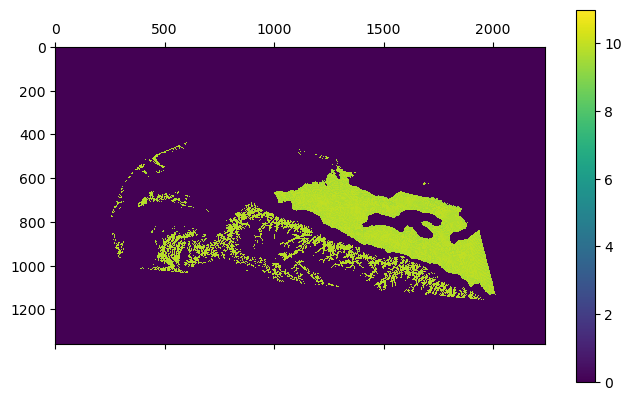

14
100.0
-1.0000000000000568


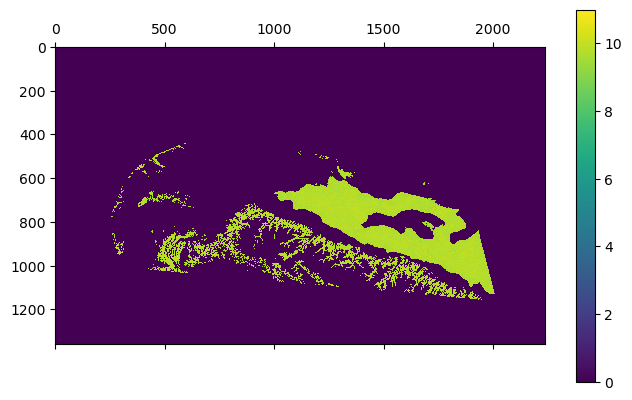

15
100.0
-1.0000000000000284


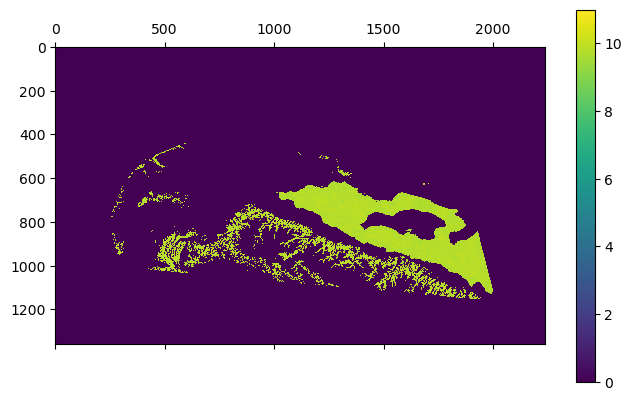

16
100.0
-1.0000000000000284


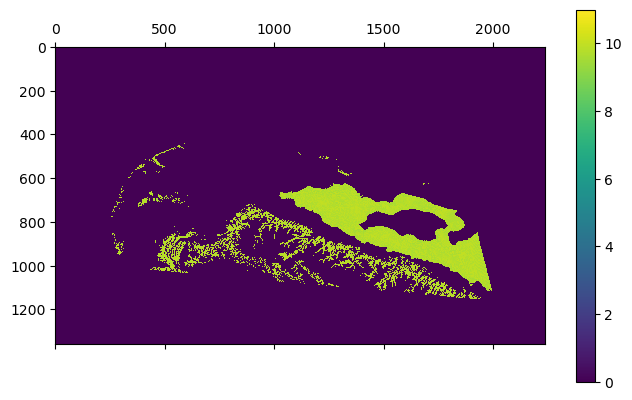

17
100.0
-1.0000000000000284


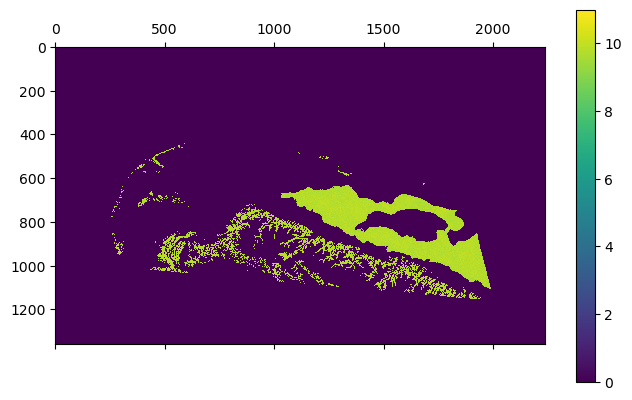

18
100.0
-1.0000000000000568


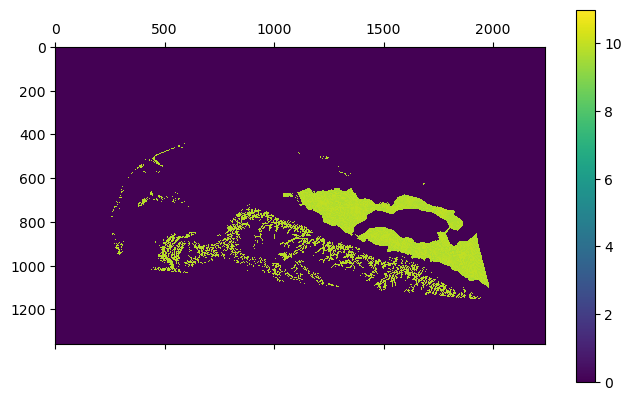

19
100.0
-1.0000000000000568


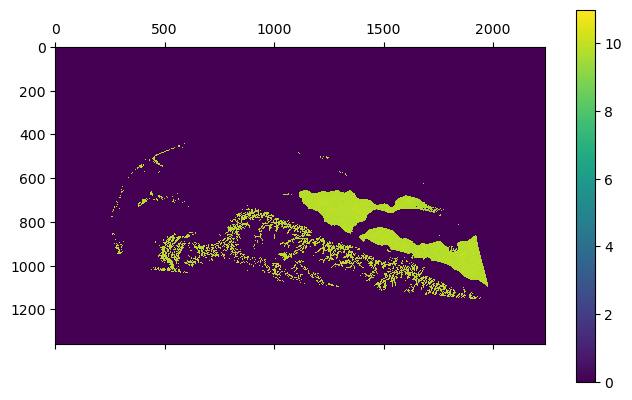

20
100.0
-1.0000000000000284


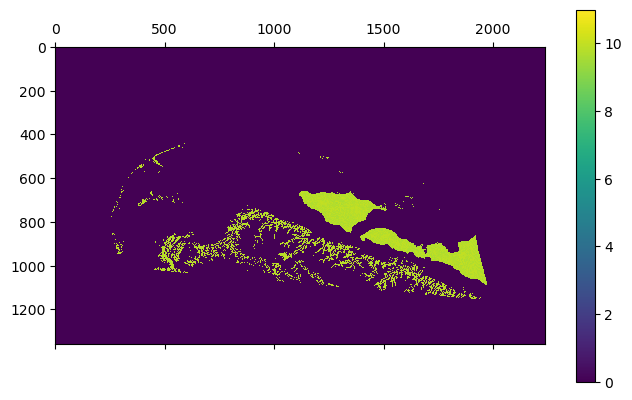

21
100.0
-1.0000000000000284


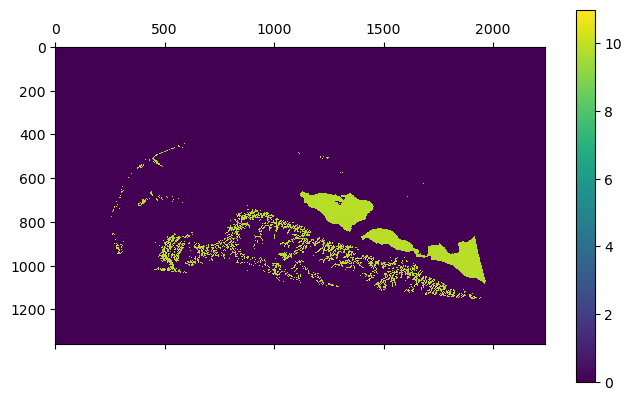

22
100.0
-1.0000000000000284


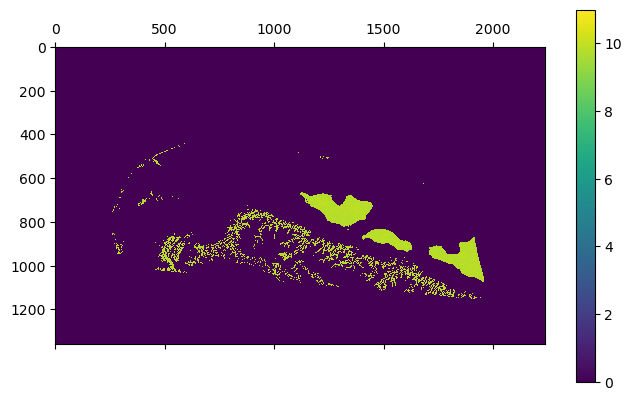

23
100.0
-1.0000000000000568


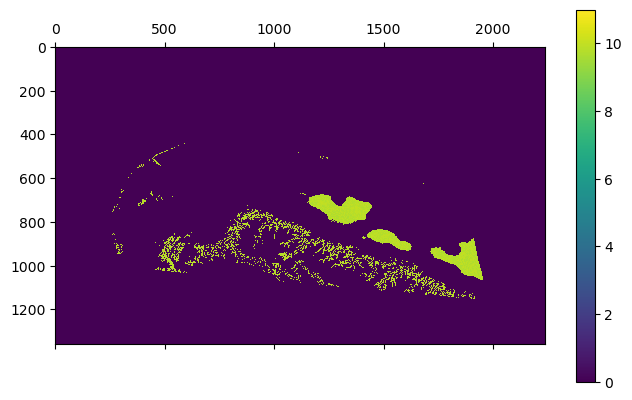

24
100.0
-1.0000000000000568


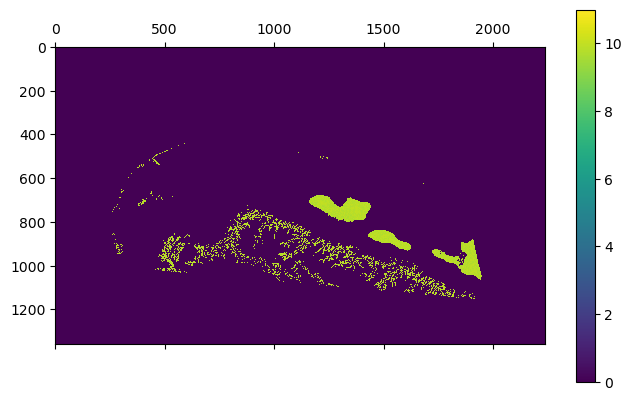

25
100.0
-1.0000000000000568


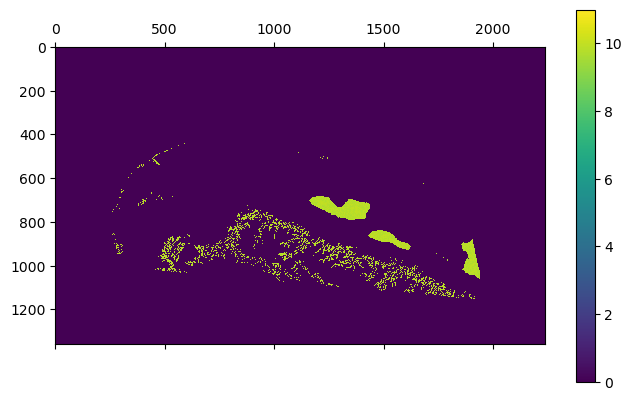

26
100.0
-1.0000000000000568


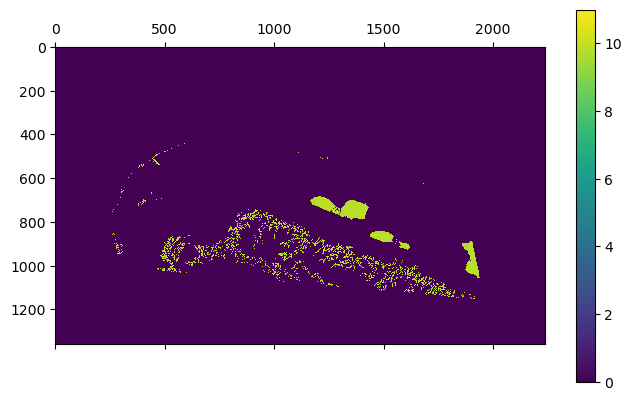

27
100.0
-1.0000000000000284


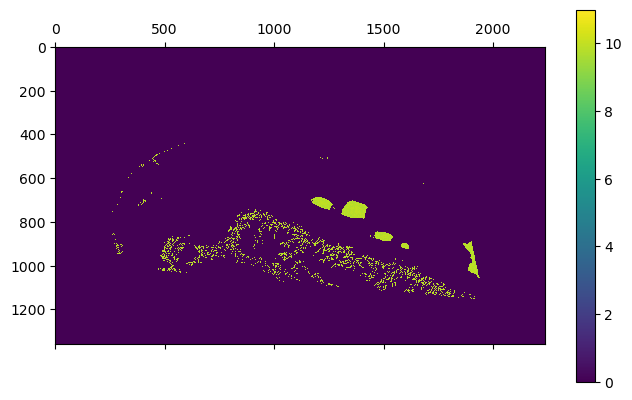

28
100.0
-1.0000000000000284


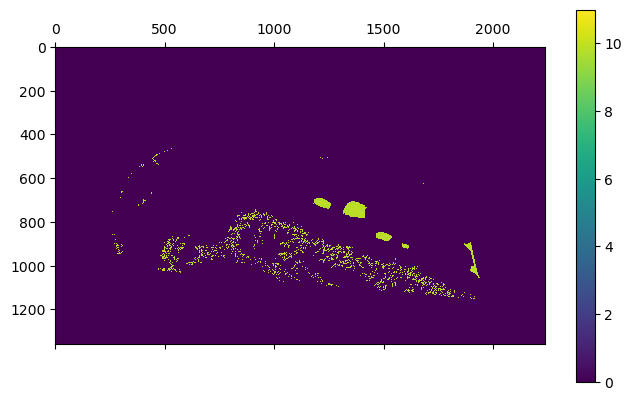

29
100.0
-1.0000000000000568


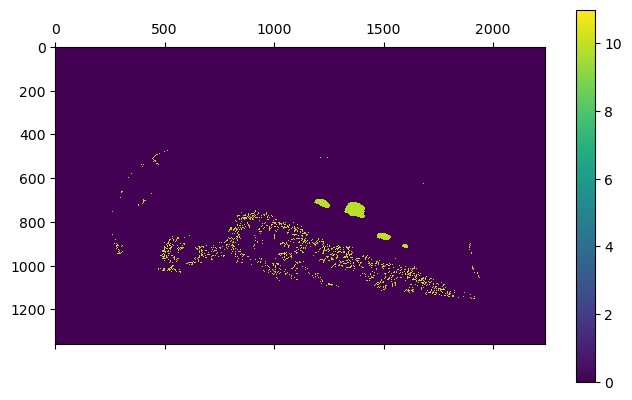

30
100.0
-1.0000000000000568


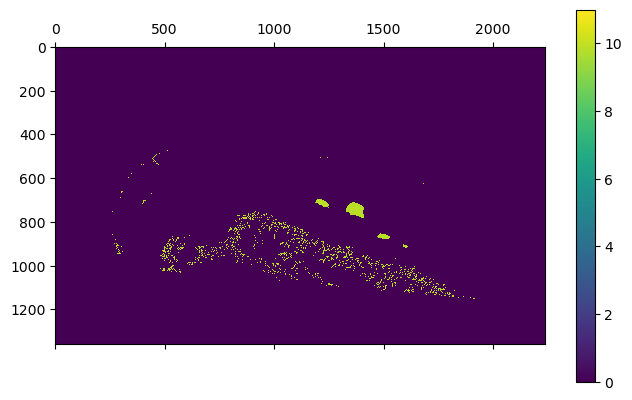

31
100.0
-1.0000000000000568


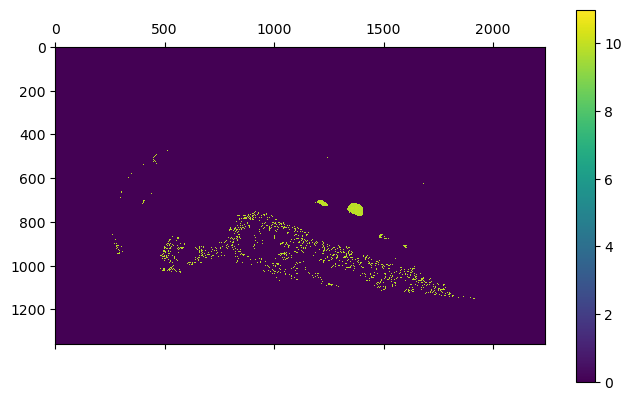

32
100.0
-1.0000000000000568


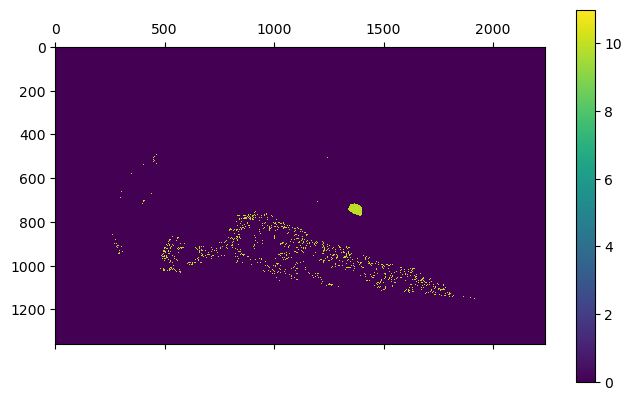

33
124.0
-1.0000000000000568


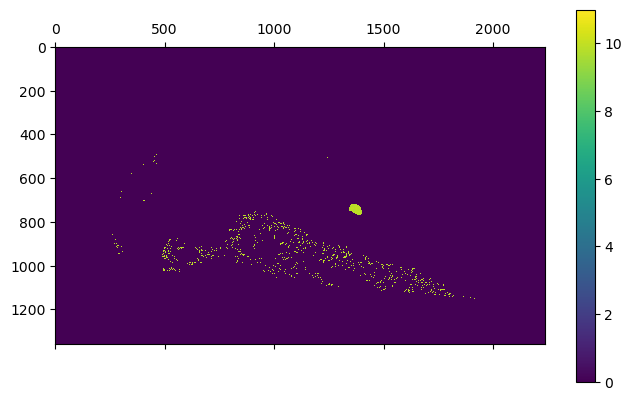

34
100.0
-1.0000000000000568


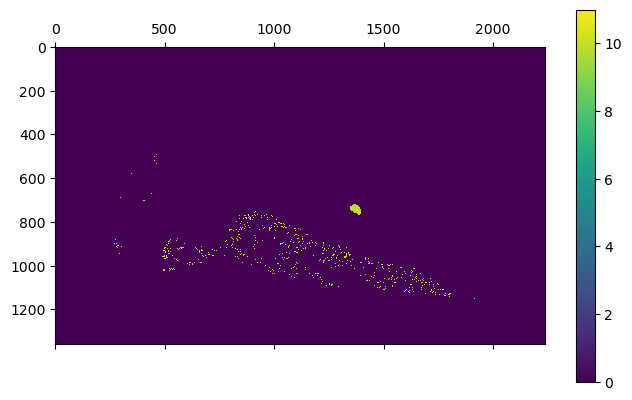

35
100.0
-1.0000000000000568


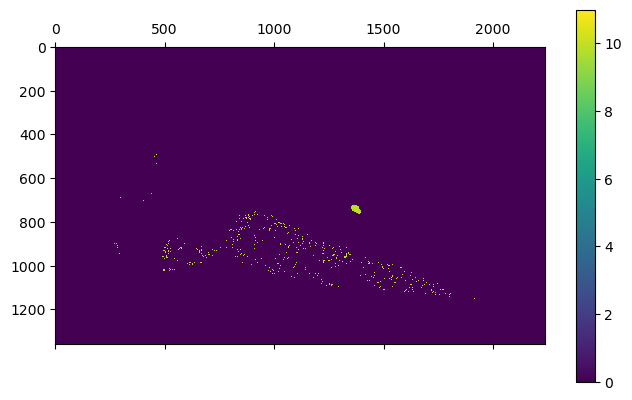

36
100.0
-1.0000000000000284


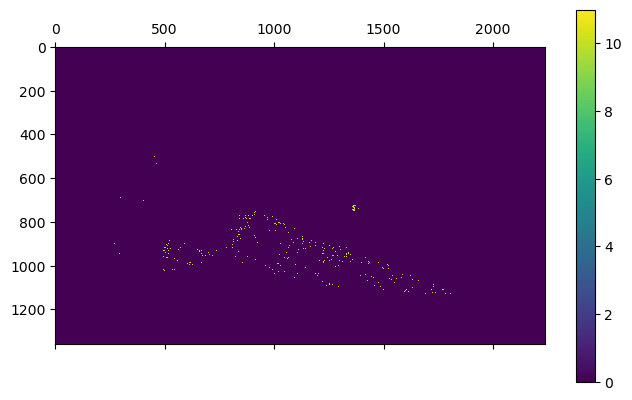

37
9.820284329927887
-1.0000000000000568


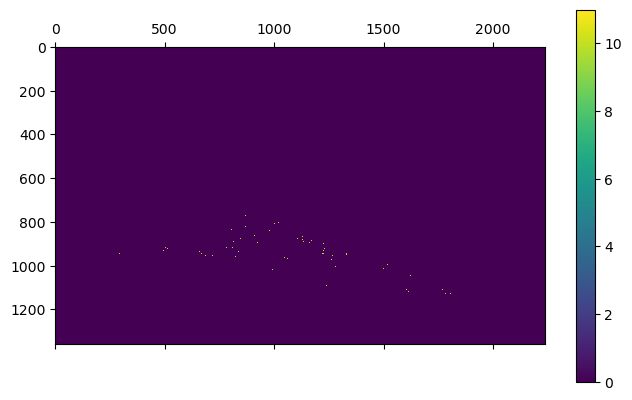

38


In [7]:
oldLay = dataTop
Nlay = np.ceil(isoPIdx)
#only three pixer are over 38. we decide to put 38 as number of layers
for i in range(39):
    Lay=(isoPIdx>i)*(oldLay - (Isopach/Nlay))+(isoPIdx<i)*(oldLay+1)
    print(np.amax(oldLay[oldLay>0]-Lay[oldLay>0]))
    print(np.amin(oldLay[oldLay>0]-Lay[oldLay>0]))
    delta = oldLay-Lay
    plt.matshow(delta[0,:,:], vmin=0, vmax=11)
    plt.colorbar()
    plt.show()
    print(i)
    oldLay = Lay
    fileName = 'lay' + str(i) + '.asc'
    with rasterio.open(fileName, 'w', **metadata) as dst:
    # Write the modified data to the new raster file
        dst.write(Lay)
    

In [8]:
np.amax(Nlay)

39.0